In [1]:
import pandas as pd
data_file_path = "C:/Users/LiwiaPadowska/Desktop/THESIS/Repos/GANs/dataset/time_series_15min_singleindex.csv"  # Replace
data = pd.read_csv(f"{data_file_path}")
data.head()

display(data["utc_timestamp"].min)
display(data["NL_solar_generation_actual"])
print(data.columns)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/LiwiaPadowska/Desktop/THESIS/Repos/GANs/dataset/time_series_15min_singleindex.csv'

In [2]:
# import pandas as pd
# from tslumen import Dashboard

# # instantiate the Dashboard
# dashboard  = Dashboard(
#     data,                  # the timeseries dataframe
#     meta={               # optional: dictionary with the metadata
#         'frame': "HU_solar_generation_actual",  # <key: str>: <value: str>
#         'series': {...}, # <column name: str>: <series description: str>
#     }
# )

# # run the server
# dashboard.run_server(mode="inline", host="localhost", port='8000', debug=True)

NameError: name 'tslumen' is not defined

In [5]:
import pandas as pd

def select_and_save_columns(input_df, output_filename):
    # List of columns to select
    selected_columns = [
        'utc_timestamp',
        'HU_load_actual_entsoe_transparency',
        'HU_load_forecast_entsoe_transparency',
        'HU_solar_generation_actual',
        'HU_wind_onshore_generation_actual',
        'LU_load_actual_entsoe_transparency',
        'LU_load_forecast_entsoe_transparency',
        'NL_load_actual_entsoe_transparency',
        'NL_load_forecast_entsoe_transparency',
        'NL_solar_generation_actual',
        'NL_wind_generation_actual',
        'NL_wind_offshore_generation_actual',
        'NL_wind_onshore_generation_actual'
    ]

    # Select the specified columns from the DataFrame
    selected_df = input_df[selected_columns]

    # Assuming your DataFrame has a 'datetime' column, if not, replace it with the actual datetime column name
    # For example, if the datetime column is named 'timestamp':
    # selected_df = selected_df.set_index('timestamp')

    # Set the datetime column as the index
    selected_df = selected_df.set_index('utc_timestamp')

    # Save the selected DataFrame to a CSV file
    selected_df.to_csv(output_filename)

select_and_save_columns(data, "solar_15min.csv")

C:\Users\LiwiaPadowska\AppData\Local\Temp\ipykernel_36336\2674066048.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_data['cet_cest_timestamp'] = pd.to_datetime(solar_data['cet_cest_timestamp'])


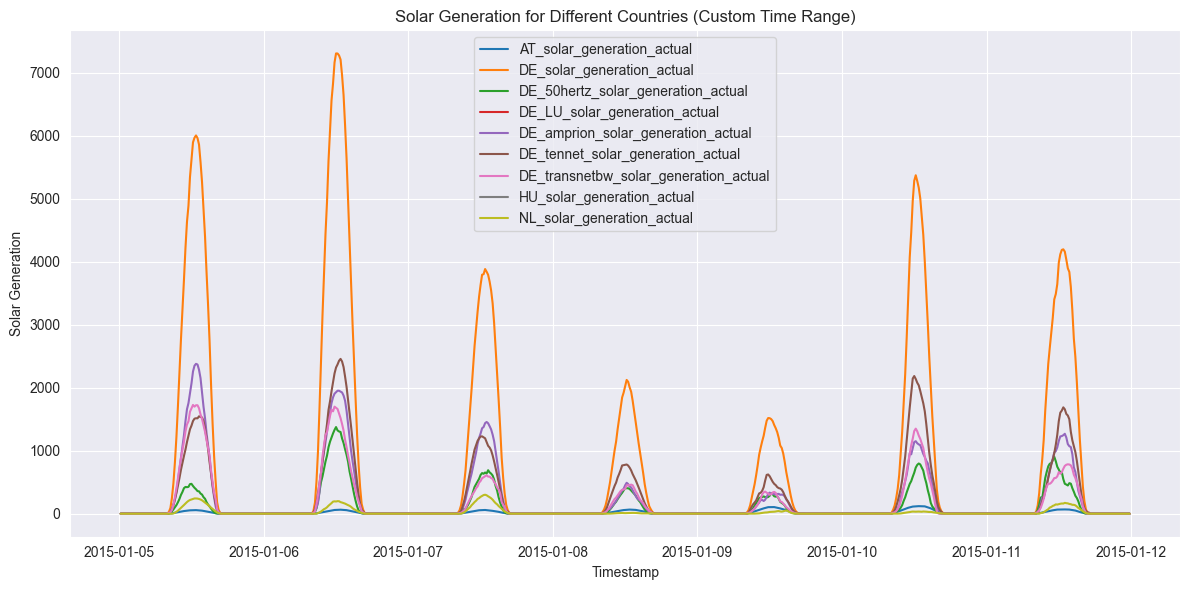

In [18]:
def plot_arbitrary_solar_generation(data_file, start_date, end_date):
    # Read the CSV file
    data = pd.read_csv(data_file)
     # Convert timestamps to datetime
    start_date = pd.to_datetime(start_date).tz_localize('Europe/Berlin')
    end_date = pd.to_datetime(end_date).tz_localize('Europe/Berlin')

    # Columns related to solar generation
    solar_columns = [
        'utc_timestamp', 'cet_cest_timestamp',
        'AT_solar_generation_actual', 'DE_solar_generation_actual', 'DE_50hertz_solar_generation_actual',
        'DE_LU_solar_generation_actual', 'DE_amprion_solar_generation_actual', 'DE_tennet_solar_generation_actual',
        'DE_transnetbw_solar_generation_actual', 'HU_solar_generation_actual', 'NL_solar_generation_actual'
    ]

    # Extract relevant columns and filter based on the time range
    solar_data = data[solar_columns]
    solar_data['cet_cest_timestamp'] = pd.to_datetime(solar_data['cet_cest_timestamp'])
    solar_data = solar_data[(solar_data['cet_cest_timestamp'] >= start_date) &
                            (solar_data['cet_cest_timestamp'] <= end_date)]

    # Plotting each country's solar generation data for the specified time range
    plt.figure(figsize=(12, 6))

    for column in solar_data.columns[2:]:
        plt.plot(solar_data['cet_cest_timestamp'], solar_data[column], label=column)

    plt.xlabel('Timestamp')
    plt.ylabel('Solar Generation')
    plt.title('Solar Generation for Different Countries (Custom Time Range)')
    plt.legend()
    plt.tight_layout()

    # Save the plot
    plt.savefig('custom_solar_generation_plot.png')
    plt.show()

    # Save the aggregated solar generation data for the custom time range to a new CSV file
    solar_data.to_csv('custom_aggregated_solar_generation.csv', index=False)

start_date = '2015-01-05 00:15:00'  # Replace with your start date
end_date = '2015-01-11 23:59:59'    # Replace with your end date
plot_arbitrary_solar_generation(data_file_path, start_date, end_date)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame containing the mentioned columns

# Preprocess the data
solar_data = data[['datetime_column', 'NL_solar_generation_actual']].copy()  # Replace 'datetime_column'
solar_data.set_index('datetime_column', inplace=True)  # Set datetime_column as index
solar_data.dropna(inplace=True)  # Drop rows with missing values if any

# Standardize the data
scaler = StandardScaler()
solar_data_scaled = scaler.fit_transform(solar_data)

# Find optimal number of clusters (Elbow Method)
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(solar_data_scaled)
    sse.append(kmeans.inertia_)

# Plot Elbow curve to determine optimal k
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

# Select optimal k and perform K-means clustering
k = 3  # Replace with the optimal number of clusters obtained from the Elbow Method
kmeans = KMeans(n_clusters=k, random_state=42)
solar_data['Cluster'] = kmeans.fit_predict(solar_data_scaled)

# Visualize clusters
plt.figure(figsize=(12, 8))
for cluster in range(k):
    cluster_data = solar_data[solar_data['Cluster'] == cluster]
    plt.plot(cluster_data.index, cluster_data['NL_solar_generation_actual'], label=f'Cluster {cluster}')

plt.title('K-means Clustering of Solar Power Generation')
plt.xlabel('Date')
plt.ylabel('Solar Generation')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()